In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
xs = np.random.randint(0, 100, 50)
ys = np.random.randint(0, 100, 50)

In [3]:
df = pd.DataFrame({"x":xs, "y":ys})

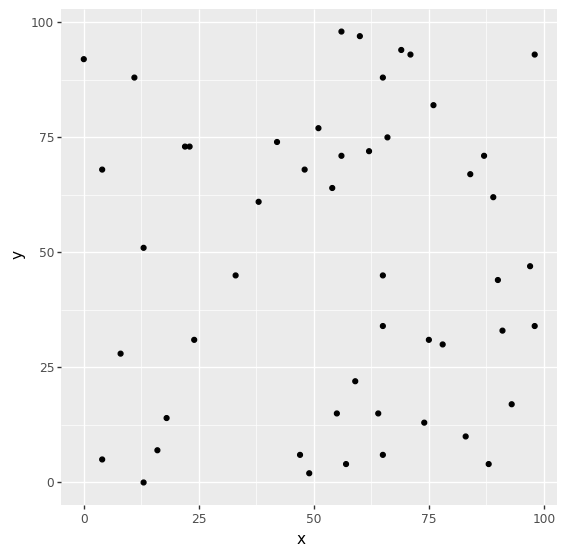

<ggplot: (8784203695261)>

In [4]:
ggplot(df, aes(x="x", y="y")) + geom_point() + theme(aspect_ratio=1)

In [5]:
def distance(xs, ys, i, j) :
    return np.sqrt((xs[i] - xs[j]) ** 2 + 
                   (ys[i] - ys[j]) ** 2)

In [6]:
distance(xs, ys, 4, 7)

51.0098029794274

In [7]:
tour = np.arange(len(xs))

In [8]:
tour

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [9]:
def tour_distance(t, xs, ys):
    d = 0
    s = len(t)
    for i in range(s):
        d += distance(xs, ys, t[i], t[(i + 1) % s])
    return d

In [10]:
tour_distance(tour, xs, ys)

2653.711040558847

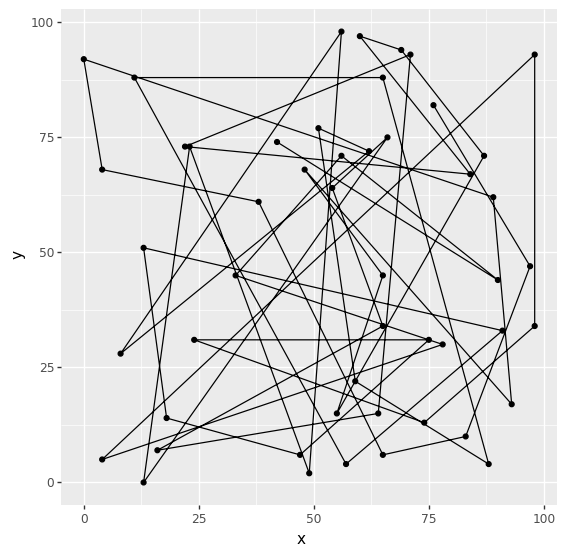

<ggplot: (8784199434623)>

In [11]:
ggplot(df, aes(x="x", y="y")) + geom_point() + geom_path() + theme(aspect_ratio=1)

In [12]:
def swap(t, i, j):
    t[i], t[j] = t[j], t[i]

In [13]:
swap(tour, 4, 18)

In [14]:
tour

array([ 0,  1,  2,  3, 18,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17,  4, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [15]:
tour_distance(tour, xs, ys)

2624.140977076655

In [16]:
df = df.reindex(tour)

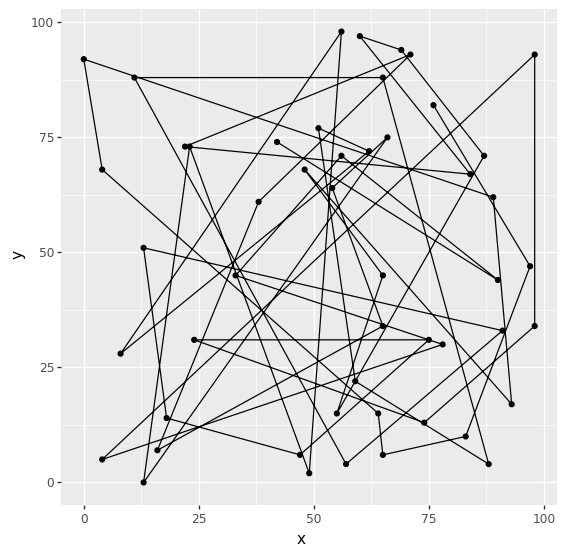

<ggplot: (8784203917032)>

In [17]:
ggplot(df, aes(x="x", y="y")) + geom_point() + geom_path() + theme(aspect_ratio=1)

In [35]:
class Map():
    
    def __init__(self, size):
        self.size = size
        self.xs = np.random.randint(1, 99, size)
        self.ys = np.random.randint(1, 99, size)
        
    def distance(self, i, j):
        return np.sqrt((self.xs[i] - self.xs[j]) ** 2 + 
                       (self.ys[i] - self.ys[j]) ** 2)        

class Tour():
    
    def __init__(self, m):
        self.m = m
        self.cities = np.arange(self.m.size)
        np.random.shuffle(self.cities)
        
    def clone(self):
        c = Tour(self.m)
        c.cities = np.copy(self.cities)
        return c
    
    def distance(self):
        d = 0
        for i in range(self.m.size):
            d += self.m.distance(self.cities[i], self.cities[(i + 1) % self.m.size])
        return d        
    
    def swap(self, i, j):
        self.cities[i], self.cities[j] = self.cities[j], self.cities[i]
        
    def plot(self):
        df = pd.DataFrame({"x":self.m.xs, 
                           "y":self.m.ys})
        df = df.reindex(self.cities)
        return ggplot(df, aes(x="x", y="y")) + geom_point() \
    + geom_path() + theme(aspect_ratio=1) + xlim(0, 100) + ylim(0, 100)

    def mutate(self):
        i, j = np.random.randint(0, self.m.size, 2)
        self.swap(i, j)
    
    def crossover(self, other):
        i, j = np.random.randint(0, self.m.size, 2)
        a = min(i, j)
        b = max(i, j)
        newa = -1 * np.ones(self.m.size, dtype=np.int)
        newb = -1 * np.ones(self.m.size, dtype=np.int)
        for x in range(a, b + 1):
            newa[x] = other.cities[x]
            newb[x] = self.cities[x]
        for t, v in ((newa, self), (newb, other)):
            c = 0
            i = 0
            while c < v.m.size:
                if t[c] != -1:
                    c += 1
                else:
                    if v.cities[i] not in t:
                        t[c] = v.cities[i]
                        c += 1
                    i += 1    
        self.cities = newa
        other.cities = newb

In [36]:
world = Map(50)
t = Tour(world)
t2 = t.clone()

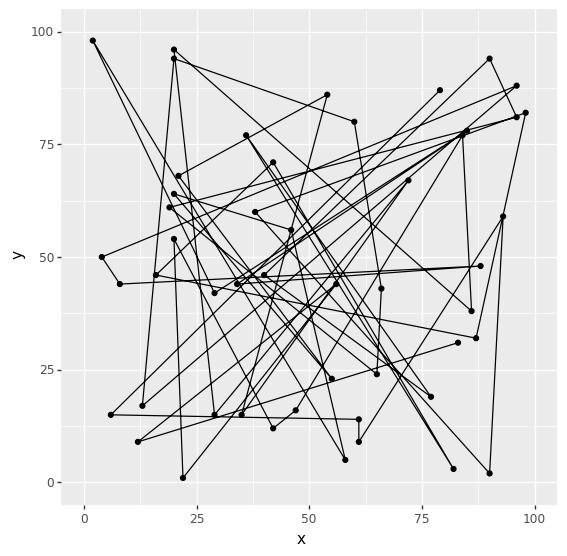

<ggplot: (8784203955725)>

In [20]:
t.plot()

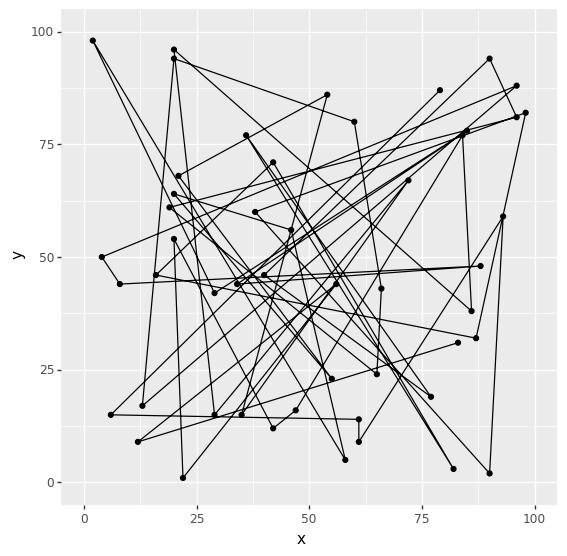

<ggplot: (8784203904597)>

In [21]:
t2.plot()

In [22]:
t.distance()

2970.9310479377536

In [23]:
t2.distance()

2970.9310479377536

In [24]:
t2.swap(4, 22)

In [25]:
t2.distance()

2905.167873298662

In [26]:
def descent(t):
    finished = False
    while not finished:
        d = t.distance()
        best_d = d
        best_i = -1
        best_j = -1
        s = t.m.size
        finished = True
        for i in range(s):
            for j in range(i + 1, s):
                t.swap(i, j)
                od = t.distance()
                if od < best_d:
                    finished = False
                    best_d = od
                    best_i = i
                    best_j = j
                t.swap(i, j)
        if not finished:
            t.swap(best_i, best_j)
            print(t.distance())

In [27]:
descent(t2)

2696.9620644820143
2526.774163376256
2364.054798128867
2203.117022892607
2045.106486791986
1896.4562358653895
1773.458601448115
1678.2633018922568
1590.7488397222974
1490.741283135681
1422.4481717283074
1366.5887477663446
1316.660619575498
1273.5791785407948
1234.6847047530327
1194.6314406424156
1156.7633254391276
1121.6184735046568
1087.7696257914508
1059.253517275912
1023.5726333912486
995.9693118646162
981.9621158217578
968.2523413211754
955.3738974933366
943.7261556685213
932.2037903703323
918.1108886774642
908.8713602415927
902.1850646684001
896.3688440170064
890.867081614215
877.8114792336133
867.9909277607638
841.8013026282757
816.297299812164
797.381431983375
790.5760357413163
774.0655464991157
771.4805081551847
771.0491247337118
765.2122849045988
764.9016461739745


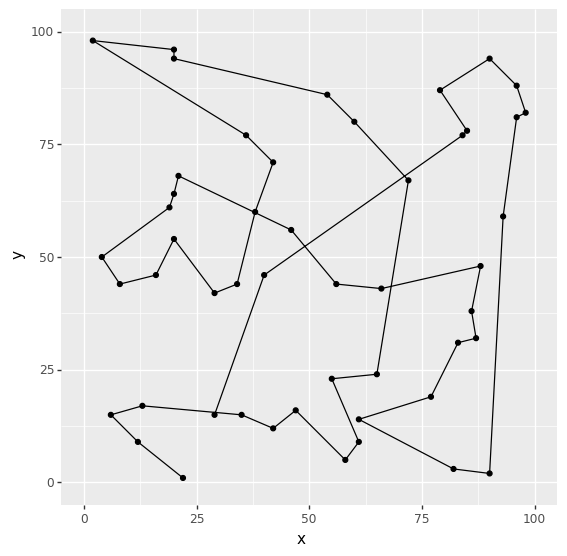

<ggplot: (8784203767390)>

In [28]:
t2.plot()

In [29]:
def annealing(t, temp, decay, stop):
    while temp > stop:
        bd = t.distance()
        i, j = np.random.randint(0, t.m.size, 2)
        t.swap(i, j)
        nd = t.distance()
        delta = nd - bd
        if delta >= 0:
            p = np.exp(-delta / temp)
            if np.random.random() > p:
                t.swap(i, j)
        temp *= decay

In [30]:
t3 = t.clone()

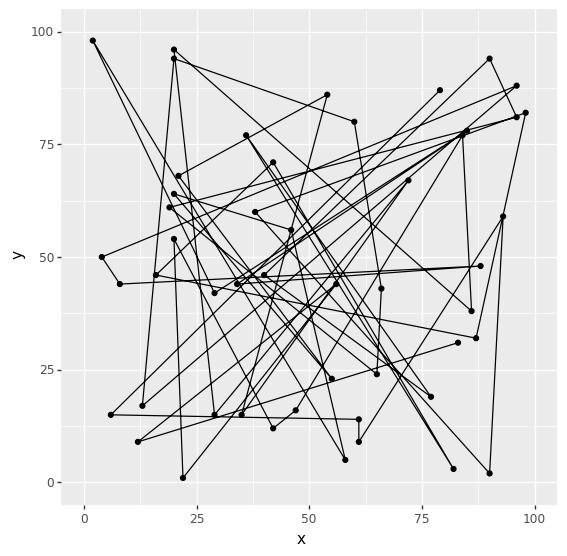

<ggplot: (8784204585825)>

In [31]:
t3.plot()

In [32]:
annealing(t3, 5000, 0.999, 0.00001)

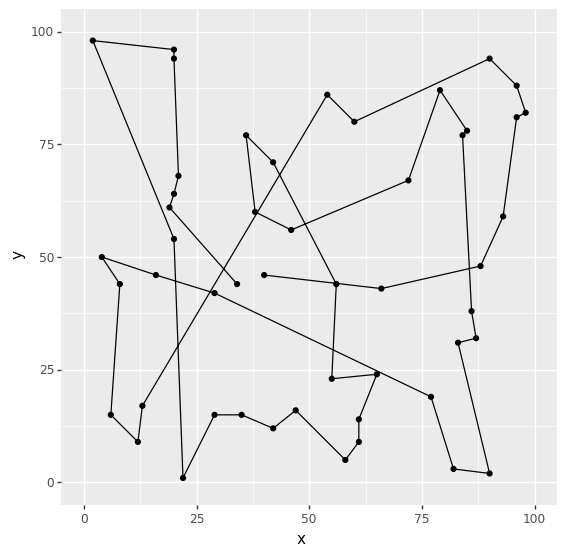

<ggplot: (8784203918716)>

In [33]:
t3.plot()

In [34]:
t3.distance()

870.811355160804

In [37]:
psize = 200
size = 50
iter = 100
mutation_rate = 0.15

world = Map(size)
population = []
for p in range(psize):
    population.append(Tour(world))

In [38]:
population[2].distance()

2601.2914893372326

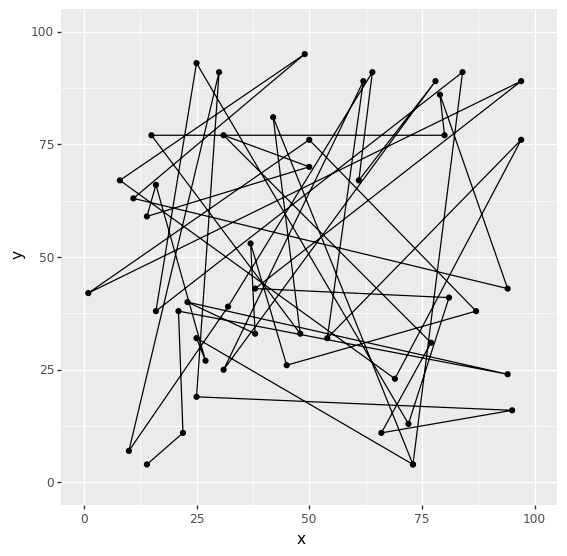

<ggplot: (8784204558972)>

In [39]:
population[2].plot()

In [40]:
def evoalg(pop, iterations):
    #bestever
    
    for i in range(iterations):
        
        # evaluate (use the distance function)
        
        # select (Tournament)
        newpop = []
        for p in range(len(pop)):
            a, b = np.random.randint(0, len(pop), 2)
            if pop[a].distance() < pop[b].distance():
                newpop.append(pop[a].clone())
            else:
                newpop.append(pop[b].clone())
        pop = newpop
        
        # crossover
        for p in range(0, len(pop), 2):
            pop[p].crossover(pop[p + 1])
        
        # mutation
        for p in range(len(pop)):
            if np.random.random() < mutation_rate:
                pop[p].mutate()

        best = pop[0].distance()
        bestn = 0
        ave = best
        for m in range(1, len(pop)):
            ave += pop[m].distance()
            if pop[m].distance() < best:
                best = pop[m].distance()
                bestn = m
        ave /= len(pop)
        print(i, best, ave)      

    return bestn, pop

In [41]:
b, pop = evoalg(population, iter)

0 2107.167247339933 2548.9615000662498
1 2167.8585936199815 2499.647814981908
2 2114.6271843354307 2457.2764827914834
3 2092.2293648951368 2412.8417332626295
4 2001.4274598084248 2371.0989750449085
5 2020.7089535870514 2347.258408751534
6 1896.116951565989 2331.1495235118127
7 2034.6194262186552 2302.539441610074
8 1911.9496995482007 2307.671887972543
9 1991.6458997364764 2304.3272437552687
10 1957.3074177057595 2286.8990892222578
11 1988.7627762450172 2296.1693467844448
12 1890.6274695055204 2276.1020064071986
13 1870.6508017376668 2266.854152028968
14 1885.540586334981 2255.882885170233
15 1867.3901603843283 2220.8229706972797
16 1884.000591766742 2203.7519467522116
17 1805.2396153975749 2180.8178335040534
18 1824.054667691799 2154.8734554124626
19 1806.462318687671 2145.1025505440507
20 1795.3707846923053 2124.9647178773607
21 1783.5545365973082 2128.512868858499
22 1779.5751913816248 2114.725923156182
23 1752.3919864670083 2108.5941861379197
24 1788.206722923259 2112.018168503705
2

In [43]:
b

99

In [44]:
pop[b].distance()

1734.8625034687373

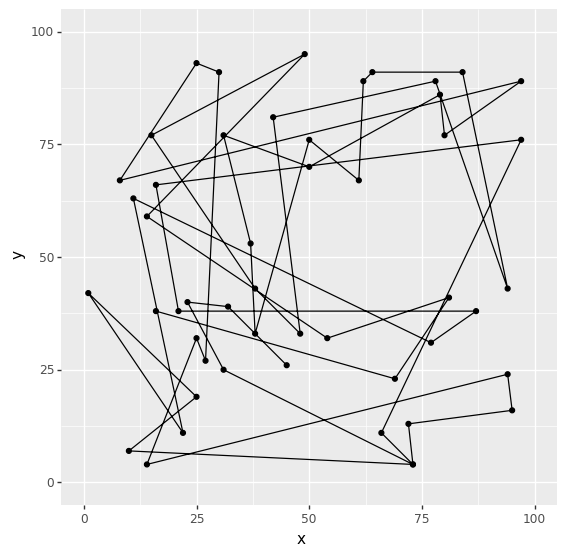

<ggplot: (8784203958929)>

In [45]:
pop[b].plot()